# Objetivo del proyecto:
Objetivo del análisis: Evaluar la accesibilidad y la distribución de estaciones de servicio en la Ciudad Autónoma de Buenos Aires (CABA). Se busca analizar la ubicación y concentración de estaciones en los distintos barrios y comunas, con el fin de detectar zonas con alta o baja densidad de cobertura. Además, se pretende localizar áreas con escasa presencia de estaciones de servicio, lo cual podría representar una oportunidad estratégica para empresas interesadas en expandir su red comercial en zonas actualmente desatendidas.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
estaciones_df= pd.read_csv("/content/estaciones_servicio_caba.csv")

In [3]:
estaciones_df

,long,lat,id,nombre,razon_social,cuit,tipo_de_boca,domicilio,calle_nombre,calle_altura,calle_cruce,barrio,comuna
0,-58.491818,-34.582446,1074,ASPRO,GNC LOS AMIGOS S.A.,30-64711854-9,GNC,"AV. DE LOS CONSTITUYENTES 4480 ESQ. VALLEJOS, ...",DE LOS CONSTITUYENTES AV.,NaN,MENDOZA,Villa Pueyrredon,Comuna 12
1,-58.413959,-34.606224,1076,ASPRO,GAS ING SOCIEDAD ANONIMA,30-64581284-7,GNC,"SARMIENTO 3412 ESQ., CIUDAD AUTóNOMA DE BUENOS...",GALLO,NaN,SARMIENTO,Almagro,Comuna 5
2,-58.371516,-34.591481,84,DAPSA,DESTILERIA ARGENTINA DE PETROLEO S.A.,30-55025533-9,LIQUIDOS,"AVDA. E. MADERO Y SAN MARTIN, RETIRO - C.A.B.A.","MARTINEZ ZUVIRIA, GUSTAVO,",NaN,SAN MARTIN,Retiro,Comuna 1
3,-58.486913,-34.567834,114,ESSO,SERVICENTRO CONGRESO - 158698,30-50691900-9,DUAL,"AV CONGRESO 4801, CAPITAL FED ZONA 5",CONGRESO AV.,4801.0,GALVAN,Villa Urquiza,Comuna 12
4,-58.466071,-34.562203,115,ESSO,SERVICENTRO DEL TEJAR - 158625,30-50691900-9,LIQUIDOS,"MONROE 3078, CAPITAL FED ZONA 5","BALBIN, RICARDO, DR. AV.",3078.0,MONROE,Belgrano,Comuna 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-58.429028,-34.608501,4,YPF,OPESSA YATAY,30-67877449-5,DUAL,"AVENIDA DIAZ VELEZ 4373 Y YATAY, CAPITAL FEDERAL",DIAZ VELEZ AV.,NaN,YATAY,Almagro,Comuna 5
226,-58.478230,-34.583890,3,YPF,ESTACION DE SERVICIO AVALOS SA,30-54171558-0,LIQUIDOS,"AVENIDA DE LOS INCAS 4801 Y AVALOS, CAPITAL FE...",AVALOS,NaN,DE LOS INCAS AV.,Parque Chas,Comuna 15
227,-58.471680,-34.568410,2,YPF,SERVICE NAON SRL,30-57258575-8,LIQUIDOS,"AVENIDA FELIX DE OLAZABAL 3690 Y ROMULO NAON, ...","NAON, ROMULO",NaN,OLAZABAL AV.,Belgrano,Comuna 13
228,-58.434579,-34.622871,1,YPF,DIGON SA,30-64198424-4,GNC,"AVENIDA JOSE M MORENO Y AVDA JUAN B ALBERDI, C...","ALBERDI, JUAN BAUTISTA AV.",NaN,"MORENO, JOSE MARIA AV.",Caballito,Comuna 6


# Informacion del dataset:


####Primeras cinco filas


In [ ]:
estaciones_df.head()

,long,lat,id,nombre,razon_social,cuit,tipo_de_boca,domicilio,calle_nombre,calle_altura,calle_cruce,barrio,comuna
0,-58.491818,-34.582446,1074,ASPRO,GNC LOS AMIGOS S.A.,30-64711854-9,GNC,"AV. DE LOS CONSTITUYENTES 4480 ESQ. VALLEJOS, ...",DE LOS CONSTITUYENTES AV.,NaN,MENDOZA,Villa Pueyrredon,Comuna 12
1,-58.413959,-34.606224,1076,ASPRO,GAS ING SOCIEDAD ANONIMA,30-64581284-7,GNC,"SARMIENTO 3412 ESQ., CIUDAD AUTóNOMA DE BUENOS...",GALLO,NaN,SARMIENTO,Almagro,Comuna 5
2,-58.371516,-34.591481,84,DAPSA,DESTILERIA ARGENTINA DE PETROLEO S.A.,30-55025533-9,LIQUIDOS,"AVDA. E. MADERO Y SAN MARTIN, RETIRO - C.A.B.A.","MARTINEZ ZUVIRIA, GUSTAVO,",NaN,SAN MARTIN,Retiro,Comuna 1
3,-58.486913,-34.567834,114,ESSO,SERVICENTRO CONGRESO - 158698,30-50691900-9,DUAL,"AV CONGRESO 4801, CAPITAL FED ZONA 5",CONGRESO AV.,4801.0,GALVAN,Villa Urquiza,Comuna 12
4,-58.466071,-34.562203,115,ESSO,SERVICENTRO DEL TEJAR - 158625,30-50691900-9,LIQUIDOS,"MONROE 3078, CAPITAL FED ZONA 5","BALBIN, RICARDO, DR. AV.",3078.0,MONROE,Belgrano,Comuna 13


### Columnas del dataset


In [ ]:

estaciones_df.columns

Index(['long', 'lat', 'id', 'nombre', 'razon_social', 'cuit', 'tipo_de_boca',
       'domicilio', 'calle_nombre', 'calle_altura', 'calle_cruce', 'barrio',
       'comuna'],
      dtype='object')

###Informacion de la cantidad de colmnas y filas del dataset


In [ ]:
estaciones_df.shape

(230, 13)

### Trabajo con datos nulos

In [ ]:

print("\nCantidad de valores nulos por columna:")
print(estaciones_df.isnull().sum())



Cantidad de valores nulos por columna:
long              0
lat               0
id                0
nombre            0
razon_social      0
cuit              0
tipo_de_boca      4
domicilio         0
calle_nombre      0
calle_altura    153
calle_cruce       0
barrio            1
comuna            1
dtype: int64


In [30]:
# Eliminar filas completamente vacías (si las hay)
estaciones_df = estaciones_df.dropna(how='all')


###Tipos de datos:


In [ ]:
print("\nTipos de datos:")
print(estaciones_df.dtypes)


Tipos de datos:
long            float64
lat             float64
id                int64
nombre           object
razon_social     object
cuit             object
tipo_de_boca     object
domicilio        object
calle_nombre     object
calle_altura    float64
calle_cruce      object
barrio           object
comuna           object
dtype: object


###Cuantas estaciones hay en total


In [ ]:
estaciones_df['nombre'].value_counts()


,count
nombre,
YPF,84
SHELL,56
ESSO,39
PETROBRAS,18
SIN MARCA,13
OIL,12
ASPRO,2
SOL,2
PDVSUR,2


####Aparecio "SIN MARCA" vamos a indagar más para ver si hay patrones entre ellas:


In [29]:

sin_marca_df = estaciones_df[estaciones_df['nombre'] == 'SIN MARCA']
print(sin_marca_df)



          long        lat   id     nombre  \
131 -58.417726 -34.638543  111  SIN MARCA   
132 -58.493311 -34.594240  110  SIN MARCA   
133 -58.502052 -34.666942  109  SIN MARCA   
134 -58.451399 -34.615701  108  SIN MARCA   
135 -58.410318 -34.615291  107  SIN MARCA   
136 -58.448869 -34.600220  106  SIN MARCA   
137 -58.385166 -34.577700  105  SIN MARCA   
138 -58.475020 -34.605820  104  SIN MARCA   
139 -58.519252 -34.610100  103  SIN MARCA   
140 -58.467940 -34.589450  102  SIN MARCA   
141 -58.465609 -34.538319  101  SIN MARCA   
142 -58.508742 -34.638731  100  SIN MARCA   
143 -58.378866 -34.618351   99  SIN MARCA   

                                         razon_social           cuit  \
131                              CHICLANA 3827 S.R.L.  30-66307899-9   
132                                GNC AGRONOMIA S.A.  30-64935548-3   
133                             ESPINOZA RUBEN EMILIO  20-04824852-8   
134                               CASADO DANIEL ANGEL  20-07727312-4   
135  POLI

In [31]:
#Donde estan ?
sin_marca_df['barrio'].value_counts()


,count
barrio,
Boedo,1
Agronomia,1
Mataderos,1
Caballito,1
Balvanera,1
Villa Crespo,1
Recoleta,1
Villa Del Parque,1
Villa Devoto,1


In [32]:
#Que tipo de boca tienen?
sin_marca_df['tipo_de_boca'].value_counts()


,count
tipo_de_boca,
LIQUIDOS,5
DUAL,2
GNC,2


Como encontre una categoria de nombre sin marca, decidi crear un nuevo dataframe sin ellas, por que no quiero que haga "ruido" mas adelante en la investigacion.

In [33]:
estaciones_con_marca_df = estaciones_df[estaciones_df['nombre'] != 'SIN MARCA']
print("Estaciones con marca:", estaciones_con_marca_df.shape[0])
print("Estaciones SIN marca:", sin_marca_df.shape[0])

Estaciones con marca: 217
Estaciones SIN marca: 13


####¿Cuántas estaciones de YPF hay en total?


In [34]:

estaciones_con_marca_df[estaciones_con_marca_df['nombre'] == 'YPF'].shape[0]


84

#Limpieza de datos:


Ahora a los datos faltantes, le agregaremos la etiqueta de "desconocido". Estos datos no nos interesan en nuestro proyecto. Asimismo, eliminaremos la altura, ya que con la longitud y latitud podemos inferir en su ubicacion.

In [35]:
# Rellenar con "DESCONOCIDO" los campos que tienen pocos nulos
estaciones_con_marca_df['tipo_de_boca'] = estaciones_df['tipo_de_boca'].fillna('DESCONOCIDO')
estaciones_con_marca_df['barrio'] = estaciones_df['barrio'].fillna('DESCONOCIDO')
estaciones_con_marca_df['comuna'] = estaciones_df['comuna'].fillna('DESCONOCIDA')

# Eliminar columna que no vamos a usar
estaciones_con_marca_df.drop(columns=['calle_altura'], inplace=True)

# Verificar que todo quedó limpio
print("Nulos restantes:")
print(estaciones_con_marca_df.isnull().sum())

print("\nColumnas actuales:")
print(estaciones_con_marca_df.columns)

Nulos restantes:
long            0
lat             0
id              0
nombre          0
razon_social    0
cuit            0
tipo_de_boca    0
domicilio       0
calle_nombre    0
calle_cruce     0
barrio          0
comuna          0
dtype: int64

Columnas actuales:
Index(['long', 'lat', 'id', 'nombre', 'razon_social', 'cuit', 'tipo_de_boca',
       'domicilio', 'calle_nombre', 'calle_cruce', 'barrio', 'comuna'],
      dtype='object')


<ipython-input-35-d92a9497c029>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones_con_marca_df['tipo_de_boca'] = estaciones_df['tipo_de_boca'].fillna('DESCONOCIDO')
<ipython-input-35-d92a9497c029>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones_con_marca_df['barrio'] = estaciones_df['barrio'].fillna('DESCONOCIDO')
<ipython-input-35-d92a9497c029>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

# Visualizacion de datos iniciales:


###Distribución de estaciones por comuna


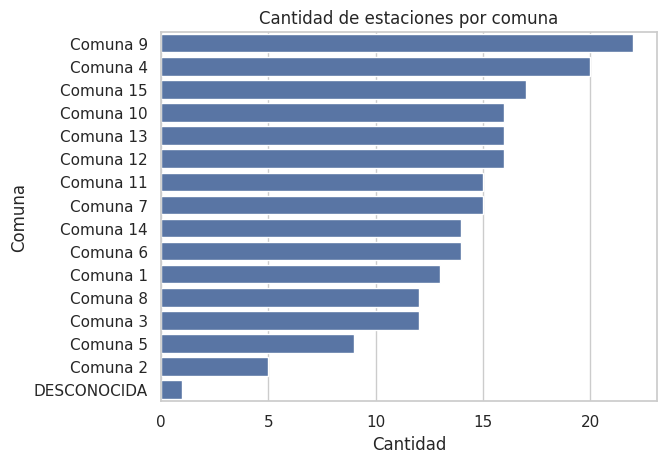

In [49]:
commune_distribution = estaciones_con_marca_df.groupby('comuna').size().reset_index(name='station_count')
sns.barplot(data=commune_distribution.sort_values('station_count', ascending=False), x='station_count', y='comuna')
plt.title("Cantidad de estaciones por comuna")
plt.xlabel("Cantidad")
plt.ylabel("Comuna")
plt.show()

### Top 10 barrios con mas cantidad de estaciones de servicio

In [50]:
estaciones_distribucion =estaciones_con_marca_df.groupby('barrio').size().reset_index(name='station_count')


<ipython-input-51-c3deff3eb4b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_barrios, x='station_count', y='barrio', palette='viridis')


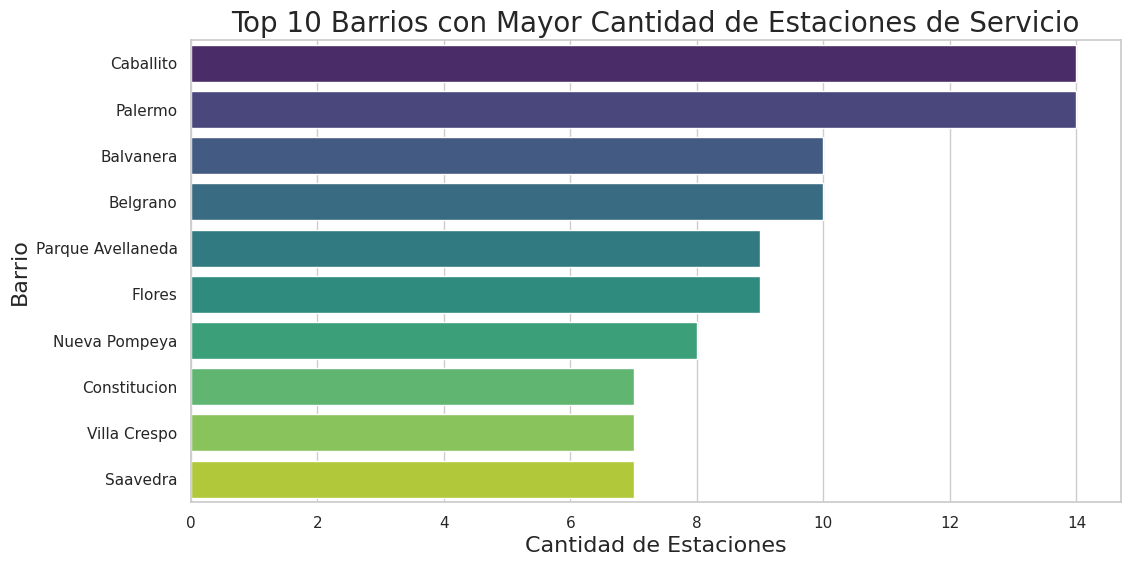

In [51]:


# Estilo visual
sns.set(style='whitegrid')

# Tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar el top 10 de barrios con más estaciones
top10_barrios = estaciones_distribucion.sort_values('station_count', ascending=False).head(10)
sns.barplot(data=top10_barrios, x='station_count', y='barrio', palette='viridis')

# Títulos y etiquetas
plt.title('Top 10 Barrios con Mayor Cantidad de Estaciones de Servicio', fontsize=20)
plt.xlabel('Cantidad de Estaciones', fontsize=16)
plt.ylabel('Barrio', fontsize=16)

# Mostrar gráfico
plt.show()


### Distribución geográfica de estaciones YPF


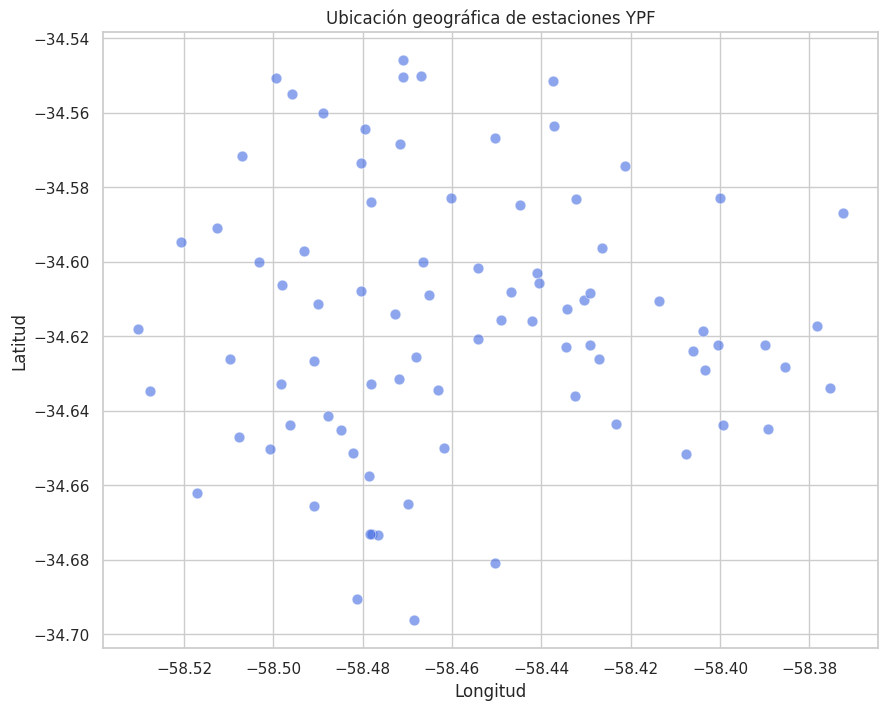

In [52]:
# Filtrar solo YPF
df_ypf = estaciones_con_marca_df[estaciones_con_marca_df['nombre'].str.contains("YPF", case=False, na=False)]

sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_ypf, x='long', y='lat', color='royalblue', s=60, alpha=0.6)
plt.title('Ubicación geográfica de estaciones YPF')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

### Servicio más común

<ipython-input-53-158a48efa011>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tipo_counts, x='cantidad', y='tipo_de_boca', palette='mako')


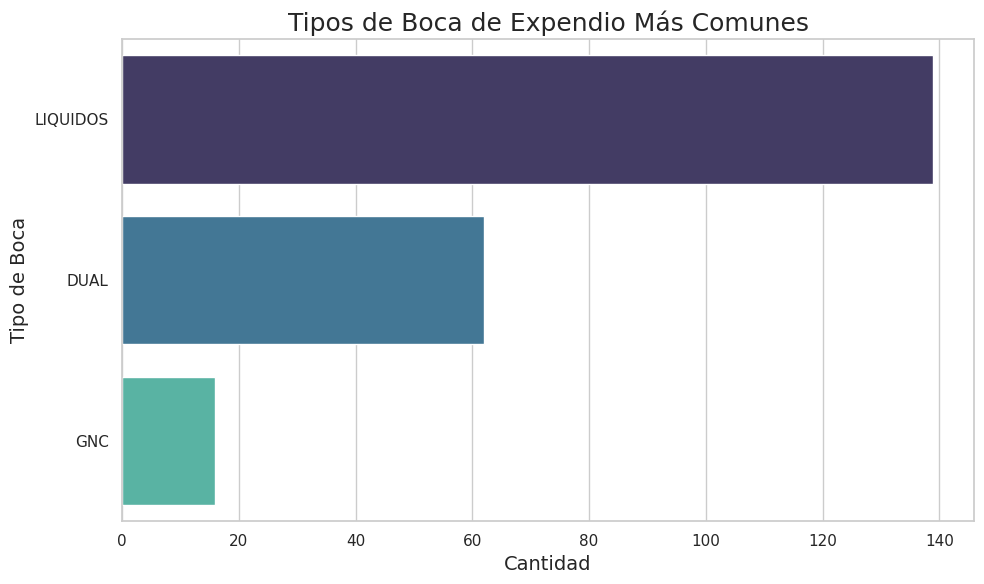

In [53]:
sns.set(style='whitegrid')

# Contar los tipos de boca
tipo_counts = estaciones_con_marca_df['tipo_de_boca'].value_counts().reset_index()
tipo_counts.columns = ['tipo_de_boca', 'cantidad']

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=tipo_counts, x='cantidad', y='tipo_de_boca', palette='mako')

# Etiquetas y título
plt.title('Tipos de Boca de Expendio Más Comunes', fontsize=18)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Tipo de Boca', fontsize=14)

# Mostrar gráfico
plt.tight_layout()
plt.show()